In [1]:
from matplotlib import image
from matplotlib.pyplot import axis, gray
from numpy.lib import math
from ImageProcess import ImageProcess
import numpy as np


def solution1():
    """
    获得中间列和中间行的灰度图像
    """
    imageP = ImageProcess()
    image_cameraman = imageP.covert_img_to_array("input/cameraman.tif")
    image_einstein = imageP.covert_img_to_array("input/einstein.tif")
    # show_cameraman,show_eninsein = np.array
    # 偶数
    if image_cameraman.shape[0] % 2 == 0:
        line1 = imageP.scan_gray_img_line(
            image_cameraman, image_cameraman.shape[0]/2-1, 'row')
        line2 = imageP.scan_gray_img_line(
            image_cameraman, image_cameraman.shape[0]/2, 'row')
        show_cameraman = np.vstack((line1, line2))

    else:
        show_cameraman = imageP.scan_gray_img_line(
            image_cameraman, image_cameraman.shape[0]/2, 'row')

    if image_einstein.shape[1] % 2 == 0:
        line1 = imageP.scan_gray_img_line(
            image_einstein, image_cameraman.shape[1]/2-1, 'col')
        line2 = imageP.scan_gray_img_line(
            image_einstein, image_cameraman.shape[1]/2, 'col')

        show_eninsein = np.hstack((line1, line2))
    else:
        show_eninsein = imageP.scan_gray_img_line(
            image_einstein, image_cameraman.shape[1]/2, 'col')

    imageP.show_img("scan line", (image_cameraman, show_cameraman,
                    image_einstein, show_eninsein), ("gray", "gray", "gray", "gray"))


def soulution2():
    """
    灰度转换
    """
    imageP = ImageProcess()
    image_lena = imageP.covert_img_to_array("input/lena512color.tiff")
    image_mandril = imageP.covert_img_to_array("input/mandril_color.tif")

    avg_lena = imageP.covert_rgb_to_gray(image_lena, "average")
    ntsc_lena = imageP.covert_rgb_to_gray(image_lena)

    avg_mandril = imageP.covert_rgb_to_gray(image_mandril, "average")
    ntsc_mandril = imageP.covert_rgb_to_gray(image_mandril)
    imageP.show_img("conver rgb to gray use average and NTSC",
                    (image_lena, avg_lena, ntsc_lena,
                     image_mandril, avg_mandril, ntsc_mandril),
                    (None, "gray", "gray", None, "gray", "gray"),
                    col=3
                    )


def soulution3():
    """
    高斯滤波
    """
    imageP = ImageProcess()
    image_cameraman = imageP.covert_img_to_array("input/cameraman.tif")
    image_einstein = imageP.covert_img_to_array("input/einstein.tif")
    image_lena = imageP.covert_img_to_array("input/lena512color.tiff")
    image_mandril = imageP.covert_img_to_array("input/mandril_color.tif")
    ntsc_lena = imageP.covert_rgb_to_gray(image_lena)
    ntsc_mandril = imageP.covert_rgb_to_gray(image_mandril)

    image_list = [image_cameraman, image_einstein, ntsc_lena, ntsc_mandril]
    mask_list = ["gray"]*4
    sigs = [1, 2, 3, 5]
    for i in sigs:
        w = imageP.gauss_2d_kernel(sig=i)
        cov_cameraman = imageP.conv2D(image_cameraman, w, "zero")
        cov_einstein = imageP.conv2D(image_einstein, w, "zero")
        cov_lena = imageP.conv2D(ntsc_lena, w, "zero")
        cov_mandril = imageP.conv2D(ntsc_mandril, w, "zero")
        image_list.extend([cov_cameraman, cov_einstein, cov_lena, cov_mandril])
        mask_list.extend(["gray"]*4)
    imageP.show_img("sig="+str(sigs), image_list, mask_list, col=4)


def solution4():
    """均值滤波器卷积
    """
    imageP = ImageProcess()
    kernel = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])/9
    image_cameraman = imageP.covert_img_to_array("input/cameraman.tif")
    image_einstein = imageP.covert_img_to_array("input/einstein.tif")
    cov_cameraman = imageP.conv2D(image_cameraman, kernel, "zero")
    cov_einstein = imageP.conv2D(image_einstein, kernel, "replicate")
    imageP.show_img("average", [image_cameraman, image_einstein, cov_cameraman, cov_einstein], [
                    'gray', 'gray', 'gray', 'gray'])


def solution5():
    """
    高斯滤波，并且与cv2中的相比较
    """
    import cv2
    imageP = ImageProcess()
    image_cameraman = imageP.covert_img_to_array("input/cameraman.tif")
    image_einstein = imageP.covert_img_to_array("input/einstein.tif")

    image_list = [image_cameraman, image_einstein,
                  image_cameraman, image_einstein]
    mask_list = ["gray"]*4
    sigs = [1, 2,3,5]
    for i in sigs:
        w = imageP.gauss_2d_kernel(sig=i)
        cov_cameraman = imageP.conv2D(image_cameraman, w, "replicate")
        cov_einstein = imageP.conv2D(image_einstein, w, "replicate")
        cov_cameraman_cv2 = cv2.GaussianBlur(image_cameraman, (math.ceil(
            3 * i)*2+1, math.ceil(3 * i)*2+1), sigmaX=i, sigmaY=i, borderType=cv2.BORDER_REPLICATE)
        cov_einstein_cv2 = cv2.GaussianBlur(image_einstein, (math.ceil(
            3 * i)*2+1, math.ceil(3 * i)*2+1), sigmaX=i, sigmaY=i, borderType=cv2.BORDER_REPLICATE)

        cov_cameraman_sub = cov_cameraman_cv2-cov_cameraman
        cov_einstein_sub = cov_einstein_cv2 - cov_einstein

        image_list.extend([cov_cameraman, cov_einstein,
                          cov_cameraman_sub, cov_einstein_sub])
        mask_list.extend(["gray"]*4)
    imageP.show_img("sig="+str(sigs), image_list, mask_list, col=4)


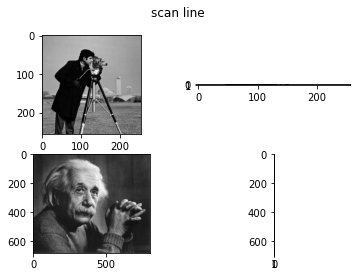

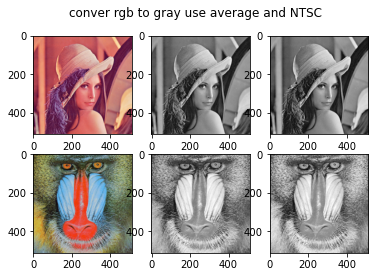

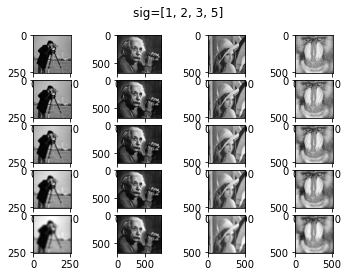

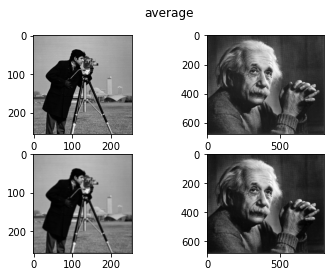

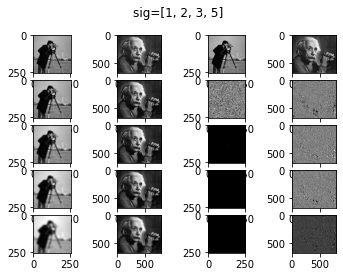

In [2]:
solution1()
soulution2()
soulution3()
solution4()
solution5()